<a href="https://colab.research.google.com/github/Ramjeet-Dixit/IITM-AIML-Rdixit/blob/main/Linear_Regression_without_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression (Straight Line)

Two variables: dependent and independent variables

y - DV
x = IV

y = a + bx + error, simple linear regression

y = a + bx1 + cx2 + dx3, multiple linear regression

evaluation of a Linear Regression Model

1. RMSE (root mean squared error) - [margin of error]

ssr / n = MSE = sqrt(mse)

2. R squared: coeff of determination = 0.80

Building or training a prediction model:

1. Training the model

2. testing the model

Data: 50K obs

y ~ x, dv ~ ivs

split data in two parts: train data and test data

70:30, 75:25, 80:20, 60:40

1. Train the model on train data

2. once model is built, evaluation of model is done on test data (RMSE and R squared)

**The Boston Housing Dataset**

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
#importing the pandas module
import pandas as pd

#Read the csv and build a dataframe
boston = pd.read_csv("boston.csv")

#explore the csv
print(boston.head()) #top 5 records

In [ ]:
boston.tail()
#prints me last 5 records

In [ ]:
#print the no. of rows and columns
boston.shape

In [ ]:
#print the quick summary
boston.info()

In [ ]:
#prints the missing values in form of count
boston.isna().sum()

In [ ]:
#prints the missing values in form of boolean
boston.isna().any()

In [ ]:
boston.head(2)

In [ ]:
#Creating feature and target arrays
#creating independent variables by x
x = boston.drop("MEDV", axis=1).values

#dependent variable: y
y = boston["MEDV"].values

In [ ]:
x.shape

we never use complete data for model building.

We divide data into train and test

train data: model building

test data: model verification/accuracy check

75:25, 70:30

Assumptions of Linear Regressions:

1. Assumes a linear (straight line) relationship bw IVs and DV

In [ ]:
import seaborn as sns
sns.pairplot(boston)

2. Distribution of DV is normal

Ideally, each IV should be normally distributed. Then , the predictions that you shall be doing for y (DV) will also be normally distributed.



In [ ]:
sns.kdeplot(boston["MEDV"])#distribution of DV based on historical data
#rather we shall check the distribution of the predictions instead of historical values of y

3. Multicollinearity: IVS are correlated

It doesnt affect the overall quality or the efficiency of the prediction model

Feature Significance: Important

In [ ]:
#split the data between train and test
from sklearn.model_selection import train_test_split

#import linear regression algorithm
from sklearn.linear_model import LinearRegression

#regression involves the logic of slope, scaling is advisable
from sklearn.preprocessing import StandardScaler

In [ ]:
#applying the standard scaler and scale the contents

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
#instantiate the standard scaler

#fit the scaler to independent variables

xs = scaler.fit_transform(x)
#x is the array of independent variables

#data gets converted into array

In [ ]:
#split the data between train and the test
#splitting is random
x_train, x_test, y_train, y_test = train_test_split(xs, y, test_size=0.3, random_state=1)
#random state: results are reproducible

In [ ]:
x_train.shape
#out of 506, 354 records are in x_train

In [ ]:
x_test.shape

In [ ]:
model = LinearRegression()#creating an instance
#fit_intercept: True
#normalize= False, deprecated

model.fit(x_train, y_train)#fitting the model of train data
#algo will do all the mathematical work and compute the desired variables
#intercept and the coeffs of each independent variable


y = a + bx, simple linear regression

y = a + bx1 + cx2, multiple linear regression

In [ ]:
#print the intercept value
model.intercept_

In [ ]:
#print the coefficents/slope of each independent variable
model.coef_

In [ ]:
o = boston.drop("MEDV", axis=1)
#dataframe of independent variables
o.columns

In [ ]:
z = pd.DataFrame(model.coef_, index=o.columns)
z

Check the efficiency of the above model on the test data

In [ ]:
#use the above model for generating MEDV predictions on test data
y_pred = model.predict(x_test)#test independent variables
#prediction means estimating the median value

In [ ]:
#error metric computations (RMSE)
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate residuals = actual - predicted
#square the residuals
#sum the squared values/n: MSE

mse = mean_squared_error(y_test, y_pred)#actual y test value, predicted y test value
rmse = sqrt(mse)
rmse #margin of error on the test data

In [ ]:
#r squared: coeff of determination
model.score(x_test,y_test)

78.36 % is the variation explained by all the independent variables

Lets check the distribution of the predictions produced by the model, This will help us in confirming the assumption of normally distributed DV.

In [ ]:
sns.kdeplot(y_pred)

4. Homogenity of variance

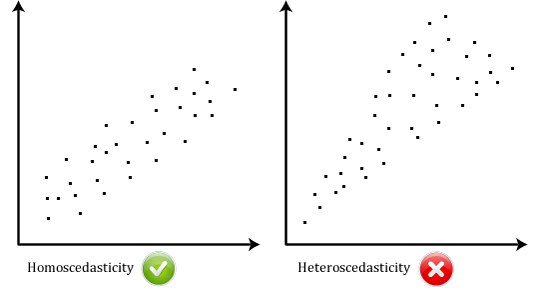

TO check the above assunmption, we need to check the distribution of Residuals (errors). If residuals are normally distibuted, then Homogenity of variance condition is satisfied.

In [ ]:
residuals = y_test - y_pred #av- pv
sns.kdeplot(residuals)

NameError: name 'y_test' is not defined

1. Low R squared followed by low margin of error
67%, 5.21 units

2. High R squared, high margin of error
91%, 120 units

ideally, test accuracy should be greater than the train accuracy

if test accuracy is too low than train accuracy: overfitting

Low Bias and High Variance: Overfitting

In [ ]:
#generating MEDV predictions on train data
y_predtrain = model.predict(x_train)
#prediction means estimating the median value

In [ ]:
# R squared
model.score(x_train, y_train)

In [ ]:
#error metric computations
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate residuals = actual - predicted
#square the residuals
#sum the squared values: MSE

mse = mean_squared_error(y_train, y_predtrain)#acutal y value, predicted y value
rmse = sqrt(mse)
rmse #margin of error

SITUATION 1, RANDOM STATE = 0
Test: RMSE is 5.41, Train: RMSE id 4.46

TEst: R is 67.33%, Train: R is 76.45%

SITUATION 2, RANDOM STATE = 1

Test accuracy > Train Accuract, No Overfitting

SITUATION 3, RANDOM STATE = 91

Test Acc < Train, Overfitting

In [ ]:
print("Training set score: {:.2f}".format(model.score(x_train, y_train)))
print("Test set score: {:.2f}".format(model.score(x_test, y_test)))

### Conventional OLS method: statsmodels: how well a given model fits the data and what variables explain or affect the outcome or what is the size of the effect

emphasis lies in the features or the inputs, included hypothesis tests and goodness of fit tests,


ML model: follow the ML tradition where choosing the best model (best line of fit) based on SSR

emphasis is on the model selection based on the test data (out of sample data) and requires cross validation

Linear Regression: Assumptions

1. Assumes a straight line (linear) relation bw the IVs and DV

2. Distribution of DV is normal

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(boston)

In [ ]:
sns.kdeplot(boston["MEDV"])

Two Objectives:

1. Prediction model

2. Feature significance

3. Multicollinearity

Corrleation: relationship bw two variables

correlation bw each IV and the DV: GOOD

correlation bw IVs: MULTICOLLINEARITY

DOESNT affect the overall quality of the prediction model

**two common evaluation metrics used for detecting multicollinearity**.

1. Correlation Coefficient

The Pearson’s correlation coefficient metric directly evaluates the strength of the relationship between two variables. Its values range between -1 and 1.

The magnitude of the correlation coefficient signifies the strength of the relationship, with a higher value corresponding to a stronger relationship.

By calculating the correlation coefficient between pairs of predictive features, you can identify features that may be contributing to multicollinearity.

2. Variance Inflation Factor

The second metric for gauging multicollinearity is the variance inflation factor (VIF). The VIF directly measures the ratio of the variance of the entire model to the variance of a model with only the feature in question.

In layman’s terms, it gauges how much a feature’s inclusion contributes to the overall variance of the coefficients of the features in the model.

A VIF of 1 indicates that the feature has no correlation with any of the other features.

Typically, a VIF value exceeding 5 or 10 is deemed to be too high. Any feature with such VIF values is likely to be contributing to multicollinearity.

**Computing the correlation coefficient**

In [ ]:
boston.corr()

In [ ]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# set figure size
plt.figure(figsize=(10,7))

sns.heatmap(boston.corr(), annot=True, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

In [ ]:

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(boston.corr(), dtype=bool))

# generate heatmap
sns.heatmap(boston.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

Eliminating features wantonly runs the risk of removing too much important information, which is detrimental to your efforts for building a reliable model.

### Computing the VIF

This is a chance to calculate the VIF values of all the previously identified features.

The statsmodels package contains a function that allows you to directly compute the VIF values of all features. Since we may need to find calculate the VIF of the features more than once, let’s create a function named ‘compute_vif’ that can perform this task.

In [ ]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):

    X = boston[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [ ]:
# features to consider removing
considered_features = ['INDUS','ZN','NX','AGE','DIS','LSTAT','RM','TAX']


# compute vif
compute_vif(considered_features).sort_values('VIF', ascending=False)

In [ ]:
# compute vif values after removing a feature
considered_features.remove('DIS')
compute_vif(considered_features)

**Now that the variance inflation factors are all within the acceptable range, the derived model will be more likely to yield statistically significant results.**

In [ ]:
#the summary result is based on complete data
import statsmodels.formula.api as smf

In [ ]:
import statsmodels.formula.api as smf

reg_all = smf.ols(formula = 'MEDV ~ CRIM + ZN + CHAS + NX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=boston).fit()
reg_all.summary()

**multicollinearity has little bearing on a model’s predictive performance.**

Comparative accuracy state between train and test

Ideal situation is : test accuracy > train accuracy

If test accuracy ~ train accuracy, Bulls eye

test < train, low bias and high variance: overfitting

test > train, high bias and low variance

corr between input and the target variable: GOOD

corr betweeb one input variable and another var: corr between inputs: multicollinearity



remove multicollinearity: VIF; tend to remove some features which are highly corr to other features

crim is highly corr to nox : remove one of the input

LOSS OF INFORMATION

not an issue from the overall prediction power or accuracy of the model

the only issue is that I can t rely on my coeff values to understand the significance of features towards my target variable

If your data has the problem of Multicollinearity, we suggest to work with regularised regression methods like Ridge and Lasso.

These methods can remove the issue of multicollinearity without deleting them.

In [ ]:
#Creating feature and target arrays
#creating independent variables by x
x = boston.drop(["MEDV","INDUS","AGE"], axis=1).values

#dependent variable: y
y = boston["MEDV"].values

In [ ]:
#applying the standard scaler and scale the contents

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
#instantiate the standard scaler

#fit the scaler to independent variables

xs = scaler.fit_transform(x)
#x is the array of independent variables

#data gets converted into array

In [ ]:
#split the data between train and the test
#splitting is random
x_train, x_test, y_train, y_test = train_test_split(xs, y, test_size=0.3, random_state=1)
#random state: results are reproducible

In [ ]:
model = LinearRegression()#creating an instance
#fit_intercept: True
#normalize= False, deprecated

model.fit(x_train, y_train)#fitting the model of train data
#algo will do all the mathematical work and compute the desired variables
#intercept and the coeffs of each independent variable


In [ ]:
Y_PRED = model.predict(x_test)

In [ ]:
model.score(x_test,y_test)
#78.36%

In [ ]:
mse = mean_squared_error(y_test, Y_PRED)
rmse = mse ** 0.5

In [ ]:
rmse
#as compared to 4.456

In [ ]:
#check overfitting
y_pretrain = model.predict(x_train)

In [ ]:
model.score(x_train,y_train)

In [ ]:
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,15.30,396.90,4.98]
model.predict([row])

In [ ]:
from sklearn.model_selection import cross_val_score

# Initialize the linear regression model
model = LinearRegression()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, xs, y, cv=3, scoring='r2')

# Calculate the average R² score across all folds
average_r2 = np.mean(cv_scores)

print("Cross-validated R² scores:", cv_scores)
print("Average R² score:", average_r2)

In [ ]:
from sklearn.model_selection import cross_val_score

# Initialize the linear regression model
model = LinearRegression()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')

# Calculate the average R² score across all folds
average_r2 = np.mean(cv_scores)

print("Cross-validated R² scores:", cv_scores)
print("Average R² score:", average_r2)

In [ ]:
from sklearn.model_selection import cross_val_score

# Initialize the linear regression model
model = LinearRegression()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, x_test, y_test, cv=5, scoring='r2')

# Calculate the average R² score across all folds
average_r2 = np.mean(cv_scores)

print("Cross-validated R² scores:", cv_scores)
print("Average R² score:", average_r2)